In [55]:
#Import necessary packages 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [56]:
# suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [57]:
# load the dataset
df = pd.read_csv('df2.csv', index_col=0)

In [58]:
print(df.shape)

(232, 22)


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 10 to 539
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  232 non-null    int64  
 1   Product_type          232 non-null    object 
 2   Ticker                232 non-null    object 
 3   close                 232 non-null    float64
 4   close_plus6           232 non-null    float64
 5   market_cap_cur        232 non-null    float64
 6   shares_out            232 non-null    float64
 7   year_inc              232 non-null    float64
 8   spx_close             232 non-null    float64
 9   spx_plus6             232 non-null    float64
 10  Previous_SBs          232 non-null    int64  
 11  Yearly_Ad_Count       232 non-null    int64  
 12  New                   232 non-null    int64  
 13  return                232 non-null    float64
 14  SP_return             232 non-null    float64
 15  overperform           

The null values have been taken care of already.

There are several unnecessary varables `close`, `close_plus6`, `spx_close`, and `spx_plus6`.

Both `return` and `SP_return` contain future information and also should be deleted from the model.


In [60]:
df.drop(axis='columns' , columns=['close', 'close_plus6', 'spx_close', 'spx_plus6', 'return', 'SP_return' ], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 10 to 539
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  232 non-null    int64  
 1   Product_type          232 non-null    object 
 2   Ticker                232 non-null    object 
 3   market_cap_cur        232 non-null    float64
 4   shares_out            232 non-null    float64
 5   year_inc              232 non-null    float64
 6   Previous_SBs          232 non-null    int64  
 7   Yearly_Ad_Count       232 non-null    int64  
 8   New                   232 non-null    int64  
 9   overperform           232 non-null    int64  
 10  Ave_inflation_rate    232 non-null    float64
 11  CPI                   232 non-null    float64
 12  USD_per_euro          232 non-null    float64
 13  Annual_change_GDP     232 non-null    float64
 14  VIX                   232 non-null    float64
 15  change_in_businesses  

Will need to look at the NaN

In [61]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [62]:
# Split the data
X = df.drop('overperform',axis=1)
y = df['overperform']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=714)


In [63]:
# pick transformers
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(sparse=False, handle_unknown='ignore'))
])

In [64]:
# split columns into numeric and categorical
numeric_features = ['Year', 'market_cap_cur', 'shares_out', 'year_inc', 'Previous_SBs', 'Yearly_Ad_Count','New', 'Ave_inflation_rate', 'CPI','USD_per_euro', 'Annual_change_GDP','VIX','change_in_businesses']
categorical_features = ['Product_type', 'Ticker']
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
   ,('categorical', categorical_transformer, categorical_features)
]) 

In [65]:
# define the pipeline
pipeline = Pipeline(steps = [
               ('preprocessor', preprocessor)
              ,('regressor',LogisticRegression())
           ])

In [66]:
lr_model = pipeline.fit(X_train, y_train)
print (lr_model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'market_cap_cur',
                                                   'shares_out', 'year_inc',
                                                   'Previous_SBs',
                                                   'Yearly_Ad_Count', 'New',
                                                   'Ave_inflation_rate', 'CPI',
                                                   'USD_per_euro',
                                                   'Annual_change_GDP', 'VIX',
                                                   'change_in_businesses']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder

In [67]:
from sklearn.metrics import r2_score
predictions = lr_model.predict(X_test)
print (r2_score(y_test, predictions))

-0.5666666666666669


In [68]:
print (metrics.recall_score(y_test, predictions) )

0.35


In [69]:
from nltk import ConfusionMatrix 
print (ConfusionMatrix(list(y_test), list(predictions)))

  |  0  1 |
--+-------+
0 |<22> 5 |
1 | 13 <7>|
--+-------+
(row = reference; col = test)



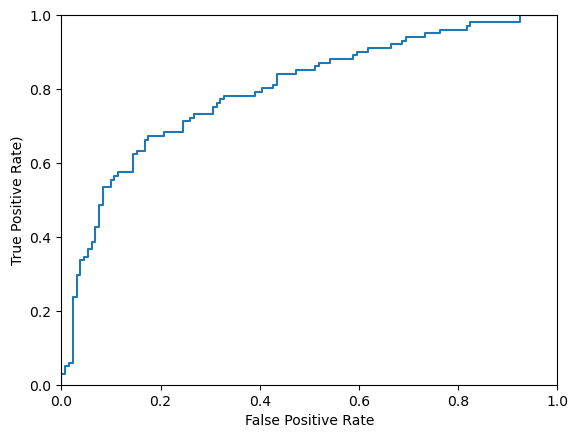

In [70]:
#ROC CURVES and AUC 
# plot ROC curve 
probs = pipeline.predict_proba(X)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y, probs) 
plt.plot(fpr, tpr) 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate)') 
plt.show()

In [71]:
# calculate AUC 
print (metrics.roc_auc_score(y, probs))


0.7957826316982843
